# Quest 04: 통계 기초

### 문제 1)

- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요

In [1]:
# bread weight : 500g 
# random sample count : 25
# random sample weight mean : 495g
# random sample weight std : 10g
# wnat to test if the bread weight is 500g within 95% confidence interval
# H0 : mu = 500
# H1 : mu != 500
# alpha = 0.05
# t-test
# t = (xbar - mu) / (s / sqrt(n))
# xbar = 495
# mu = 500
# s = 10
# n = 25
import numpy as np
from scipy import stats
# generate sample data with seed
np.random.seed(42)  
sample_data = np.random.normal(495, 10, 25)
# sample mean
xbar = np.mean(sample_data)
# sample std
s = np.std(sample_data, ddof=1)
# sample size
n = len(sample_data)
# population mean
mu = 500
# t-test
t = (xbar - mu) / (s / np.sqrt(n))
# t-distribution
df = n - 1
# critical value
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df)
# p-value
p_value = 2 * (1 - stats.t.cdf(abs(t), df))
# confidence interval
ci = (xbar - t_critical * (s / np.sqrt(n)), xbar + t_critical * (s / np.sqrt(n)))
# print results
print(f"Sample mean: {xbar:.2f}")
print(f"Sample std: {s:.2f}")
print(f"Sample size: {n}")
print(f"t-statistic: {t:.2f}")
print(f"Critical value: {t_critical:.2f}")
print(f"p-value: {p_value:.2f}")
print(f"Confidence interval: {ci[0]:.2f} to {ci[1]:.2f}")
print(f"Reject H0: {abs(t) > t_critical} or p-value < alpha: {p_value < alpha}")
# Conclusion
if abs(t) > t_critical or p_value < alpha:
    print("Reject H0: The bread weight is not 500g")
else:
    print("Fail to reject H0: The bread weight is 500g")


Sample mean: 493.36
Sample std: 9.57
Sample size: 25
t-statistic: -3.47
Critical value: 2.06
p-value: 0.00
Confidence interval: 489.42 to 497.31
Reject H0: True or p-value < alpha: True
Reject H0: The bread weight is not 500g


### 문제2) 분포 시각화

문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

 Hint)

- `plt.axvline` : y축 평행선 그리기
- `plt.fill_between` : 그래프 면적 색칠하기

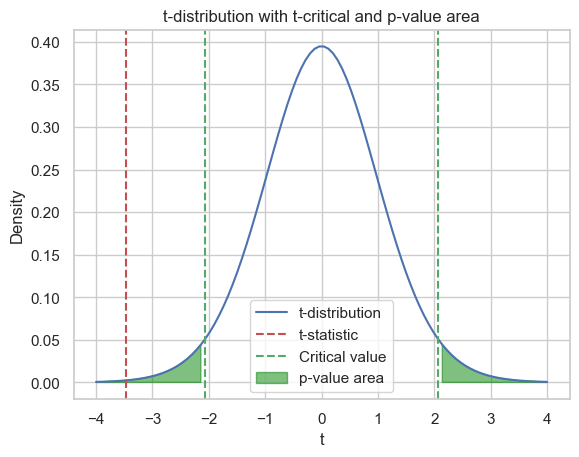

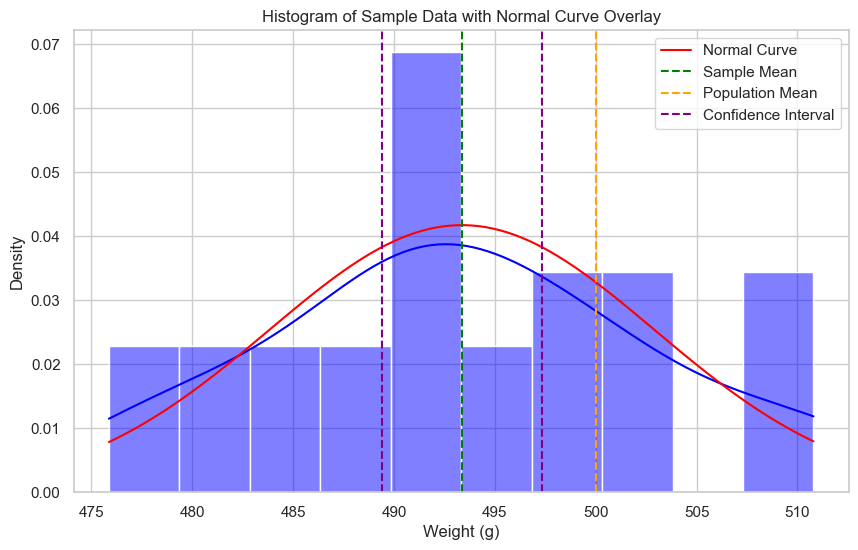

In [2]:
import numpy as np
from scipy import stats

# draw t-distribution in blue
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# t-distribution
x = np.linspace(-4, 4, 100)
y = stats.t.pdf(x, df)
plt.plot(x, y, 'b-', label='t-distribution')
# draw t-statistic in red line
plt.axvline(t, color='r', linestyle='--', label='t-statistic')
# draw critical value in dotted green line
plt.axvline(t_critical, color='g', linestyle='--', label='Critical value')
plt.axvline(-t_critical, color='g', linestyle='--')
# draw p-value area in green
plt.fill_between(x, y, where=(x <= -abs(t_critical)) | (x >= abs(t_critical)), color='green', alpha=0.5, label='p-value area')
plt.title('t-distribution with t-critical and p-value area')
plt.xlabel('t')
plt.ylabel('Density')
plt.legend()
plt.show()


# draw Histogram with Normal Curve Overlay
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(sample_data, bins=10, kde=True, stat="density", color="blue", alpha=0.5)
x = np.linspace(min(sample_data), max(sample_data), 100)
plt.plot(x, stats.norm.pdf(x, xbar, s), color="red", label="Normal Curve")
plt.axvline(xbar, color='green', linestyle='--', label='Sample Mean')
plt.axvline(mu, color='orange', linestyle='--', label='Population Mean')
plt.axvline(ci[0], color='purple', linestyle='--', label='Confidence Interval')
plt.axvline(ci[1], color='purple', linestyle='--')
plt.title('Histogram of Sample Data with Normal Curve Overlay')
plt.xlabel('Weight (g)')
plt.ylabel('Density')
plt.legend()
plt.show()


### 문제 3) 단일 t 표본 검정

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

In [3]:
# to perform t-testing with 95% confidence interval for new math education program
# math score : 75
# random student sample size : 16
# sample's math score mean : 78
# no other information
# H0 : it's not effective
# H1 : it's effective
# alpha = 0.05
# t-test
# t = (xbar - mu) / (s / sqrt(n))
# xbar = 78
# mu = 75
# s = unknown
# n = 16
# generate sample data with seed
np.random.seed(42)
#math_sample = np.random.normal(78, 5, 16)
math_sample = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]  # 예시 데이터
print(math_sample)

# sample mean
xbar = np.mean(math_sample)
# sample std
s = np.std(math_sample, ddof=1)
# sample size
n = len(math_sample)
# population mean
mu = 75
# t-test
t = (xbar - mu) / (s / np.sqrt(n))
# t-distribution
df = n - 1
# critical value
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df)
# p-value
p_value = 2 * (1 - stats.t.cdf(abs(t), df))
# confidence interval
ci = (xbar - t_critical * (s / np.sqrt(n)), xbar + t_critical * (s / np.sqrt(n)))
# print results
print(f"Sample mean: {xbar:.2f}")
print(f"Sample std: {s:.2f}")
print(f"Sample size: {n}")
print(f"t-statistic: {t:.2f}")
print(f"Critical value: {t_critical:.2f}")
print(f"p-value: {p_value:.2f}")
print(f"Confidence interval: {ci[0]:.2f} to {ci[1]:.2f}")
print(f"Reject H0: {abs(t) > t_critical} or p-value < alpha: {p_value < alpha}")
# Conclusion
if abs(t) > t_critical or p_value < alpha:
    print("귀무가설 기각: 교육프로그램은 효과가 있습니다")
else:
    print("귀무가설 채택: 교육프로그램은 효과가 없습니다")

[79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]
Sample mean: 78.25
Sample std: 1.91
Sample size: 16
t-statistic: 6.79
Critical value: 2.13
p-value: 0.00
Confidence interval: 77.23 to 79.27
Reject H0: True or p-value < alpha: True
귀무가설 기각: 교육프로그램은 효과가 있습니다


### 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.

관찰연구에서는  두개의 그룹을 t검정을 할때 등분산성을 검정하게 됩니다.  scipy.stats.levene 문서를 읽고 등분산 검정 후 적절한 검정방법을 적용해보세요. 등분산 검정에도 역시 귀무가설과 대립가설이 존재합니다.

In [4]:
# with new diet program for 12 weeks, two groups of people got weight loss as below
# group A : 5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2
# group B : 4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3
# perform t-test to check if there is a significant difference between the two groups, with confidence level of 95%
# H0 : mu_A = mu_B
# H1 : mu_A != mu_B
# alpha = 0.05
# 
# #1 check out homoscedasticity for two samples by levene's test
# 
# #2 t-test using Independent Two-Sample t-Test or Welch's t-test
# t-test using package scipy.stats / t_stat, p = ttest_ind(group_A, group_B, equal_var=True/False) 
# t-test for two independent samples (manual calculation)
# t = (xbar_A - xbar_B) / sqrt((s_A^2 / n_A) + (s_B^2 / n_B))
# p_value = 2 * (1 - stats.t.cdf(abs(t), df)
#           where df = n_A + n_B - 2 if homoscedasticity is true
#           else df = (s_A^2 / n_A + s_B^2 / n_B)^2 / ((s_A^2 / n_A)^2 / (n_A - 1) + (s_B^2 / n_B)^2 / (n_B - 1))
# xbar_A = average of group A
# xbar_B = average of group B
# s_A = std of group A
# s_B = std of group B
# n_A = sample size of group A
# n_B = sample size of group B

import numpy as np
from scipy import stats
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

Levene's Test: 두 집단(혹은 그 이상)의 **분산이 동일한지(등분산성)**를 테스트하는 방법
levene(group_A, group_B) [ scipy.stats package / levene]
- p-value < 0.05: 등분산성 기각 → Welch's t-test 사용
- p-value ≥ 0.05: 등분산성 가정 가능 → 기본 t-test 사용

In [5]:
from scipy.stats import levene
stat, p_value = levene(group_A, group_B)  
print("Levene’s Test p-value:", p_value)
if p_value < 0.05:
    print("Welch's t-test로 진행 필요")
else:
    print("독립표본 t-test로 진행 가능")


Levene’s Test p-value: 0.27026881992870333
독립표본 t-test로 진행 가능


독립 이표본 t-검정 (Independent Two-Sample t-Test)
ttest_ind(group_A, group_B, equal_var=True) # 등분산성 만족
- p-value < 0.05 → 귀무가설 기각 (차이 있음)
- p-value ≥ 0.05 → 귀무가설 채택 (차이 없음)

In [6]:
from scipy.stats import ttest_ind

# 등분산성 여부에 따라 equal_var 결정
t_stat, p = ttest_ind(group_A, group_B, equal_var=True)  # 등분산성 만족
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p:.10f}")
# 결론
if p < 0.05:
    print("귀무가설 기각: 두 그룹 간에 유의미한 차이가 있습니다.")
else:
    print("귀무가설 채택: 두 그룹 간에 유의미한 차이가 없습니다.")

t-statistic: 6.39
p-value: 0.0000031081
귀무가설 기각: 두 그룹 간에 유의미한 차이가 있습니다.


In [7]:
xbar_A = np.mean(group_A)  # 5.1
xbar_B = np.mean(group_B)  # 4.3
s_A = np.std(group_A, ddof=1)  # 0.5
s_B = np.std(group_B, ddof=1)  # 0.5
n_A = len(group_A)
n_B = len(group_B)

print(f"mean of group A: {xbar_A:.2f}")
print(f"mean of group B: {xbar_B:.2f}")
print(f"std of group A: {s_A:.2f}")
print(f"std of group B: {s_B:.2f}")
# t 통계량 계산
se = np.sqrt((s_A**2 / n_A) + (s_B**2 / n_B))
t_manual = (xbar_A - xbar_B) / se
print(f"t-statistic (manual calculation): {t_manual:.2f}")
# p-value 계산
p_value_manual = 2 * (1 - stats.t.cdf(abs(t_manual), df=n_A + n_B - 2))
print(f"p-value (manual calculation): {p_value_manual:.10f}")
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")


mean of group A: 5.31
mean of group B: 4.11
std of group A: 0.54
std of group B: 0.34
t-statistic (manual calculation): 6.13
p-value (manual calculation): 0.0000054743
t-값: 6.3898, p-value: 0.2703. 유의수준 0.05에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다


### 문제 5) 대응표본 t검정
- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.


대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나, 같은 집단에서 두 번 수집할 때 사용되는 검정입니다.( ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차) `scipy.stats` docs에서 적절한 함수를 찾아보고 적용해보세요.

#### 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])
#### 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")

    
'''
t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.
'''

In [8]:
# to check out if one exercise program is usuful to reduce their weights by t-testing two sample groups of the before and the after from one same group
# the sample size is 10
# t-test for paired samples with 95% confidence interval (대응 표본 t-검정)
# H0 : mu_before = mu_after
# H1 : mu_before != mu_after
# alpha = 0.05  
# xbar_before = 75
# xbar_after = 70
# s_before = 5
# s_after = 4
# n = 10

import numpy as np
from scipy import stats

# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])
# 차이 계산
diff = before - after
# 차이의 평균과 표준편차
xbar_diff = np.mean(diff)
s_diff = np.std(diff, ddof=1)
n = len(diff) 
# t-통계량 계산
t = xbar_diff / (s_diff / np.sqrt(n))
# 자유도
df = n - 1
# 유의수준
alpha = 0.05
# t-분포의 임계값
t_critical = stats.t.ppf(1 - alpha / 2, df)
# p-value 계산
p_value = 2 * (1 - stats.t.cdf(abs(t), df))
# 신뢰구간 계산
ci = (xbar_diff - t_critical * (s_diff / np.sqrt(n)), xbar_diff + t_critical * (s_diff / np.sqrt(n)))
# 결과 출력
print(f"Sample mean difference: {xbar_diff:.2f}")
print(f"Sample std difference: {s_diff:.2f}")
print(f"Sample size: {n}")
print(f"t-statistic: {t:.2f}")
print(f"Critical value: {t_critical:.2f}")
print(f"p-value: {p_value:.2f}")
print(f"Confidence interval: {ci[0]:.2f} to {ci[1]:.2f}")
print(f"Reject H0: {abs(t) > t_critical} or p-value < alpha: {p_value < alpha}")
# 결론
if abs(t) > t_critical or p_value < alpha:
    print("귀무가설 기각: 운동 프로그램은 효과가 있습니다")
else:
    print("귀무가설 채택: 운동 프로그램은 효과가 없습니다")

# 등분산 검증이 필요할까?
import numpy as np
from scipy import stats
# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])
# Levene's test for equal variances
stat, p_value = stats.levene(before, after)
print("Levene's Test p-value:", p_value)
if p_value < 0.05:
    print("등분산성 만족하지 않음")
else:
    print("등분산성 만족함")    

Sample mean difference: 1.50
Sample std difference: 0.53
Sample size: 10
t-statistic: 9.00
Critical value: 2.26
p-value: 0.00
Confidence interval: 1.12 to 1.88
Reject H0: True or p-value < alpha: True
귀무가설 기각: 운동 프로그램은 효과가 있습니다
Levene's Test p-value: 0.8703025812467897
등분산성 만족함


### 문제 6) 표본 추출

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.

In [9]:
!pip install kagglehub
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)


'''
Sample size: 30, Mean TotalPrice: 11.45
Sample size: 100, Mean TotalPrice: 25.33
Sample size: 300, Mean TotalPrice: 19.49
'''

Path to dataset files: /Users/hb/.cache/kagglehub/datasets/mashlyn/online-retail-ii-uci/versions/3


'\nSample size: 30, Mean TotalPrice: 11.45\nSample size: 100, Mean TotalPrice: 25.33\nSample size: 300, Mean TotalPrice: 19.49\n'

In [10]:
retail.info()
retail.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


Sample size: 30, Mean TotalPrice: 24.19, t-statistic: 0.57, p-value: 0.57, Confidence interval: 9.14 to 39.23
Sample size: 100, Mean TotalPrice: 22.45, t-statistic: 0.52, p-value: 0.60, Confidence interval: 13.10 to 31.81
Sample size: 300, Mean TotalPrice: 20.22, t-statistic: 0.07, p-value: 0.95, Confidence interval: 13.64 to 26.80
Sample size 30: Fail to reject H0: The mean TotalPrice is 20
Sample size 100: Fail to reject H0: The mean TotalPrice is 20
Sample size 300: Fail to reject H0: The mean TotalPrice is 20


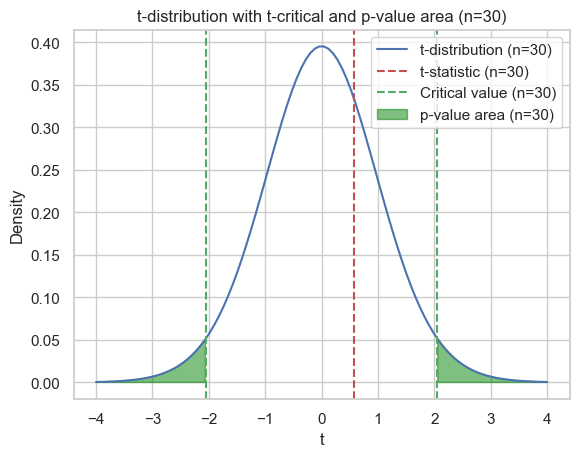

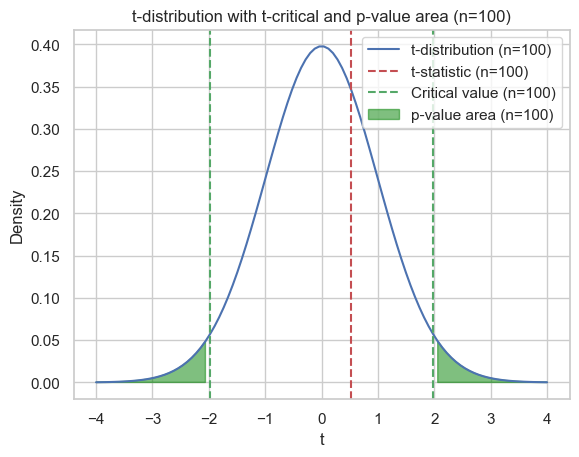

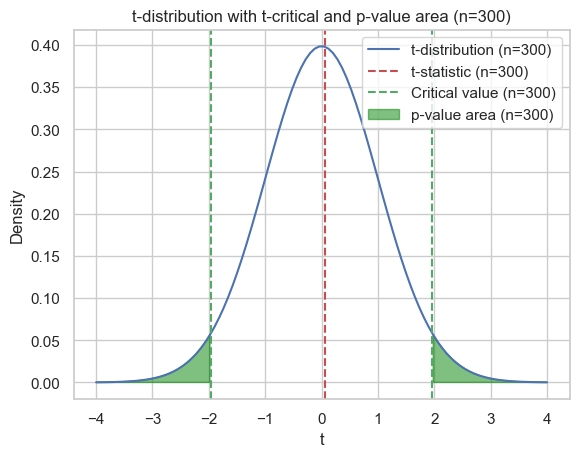

In [11]:
# Add a 'TotalPrice' column to the retail DataFrame
retail['TotalPrice'] = retail['Quantity'] * retail['Price']

#get a sample of 30, 100, 300
sample_30 = retail.sample(30, random_state=42)
sample_100 = retail.sample(100, random_state=42)
sample_300 = retail.sample(300, random_state=42)
# sample mean
mean_30 = sample_30['TotalPrice'].mean()
mean_100 = sample_100['TotalPrice'].mean()
mean_300 = sample_300['TotalPrice'].mean()
# sample std
std_30 = sample_30['TotalPrice'].std(ddof=1)
std_100 = sample_100['TotalPrice'].std(ddof=1)
std_300 = sample_300['TotalPrice'].std(ddof=1)
# sample size
n_30 = len(sample_30)
n_100 = len(sample_100)
n_300 = len(sample_300)
# population mean
mu = 20
# t-test
t_30 = (mean_30 - mu) / (std_30 / np.sqrt(n_30))
t_100 = (mean_100 - mu) / (std_100 / np.sqrt(n_100))
t_300 = (mean_300 - mu) / (std_300 / np.sqrt(n_300))
# t-distribution
df_30 = n_30 - 1
df_100 = n_100 - 1
df_300 = n_300 - 1
# critical value
alpha = 0.05
t_critical_30 = stats.t.ppf(1 - alpha / 2, df_30)
t_critical_100 = stats.t.ppf(1 - alpha / 2, df_100)
t_critical_300 = stats.t.ppf(1 - alpha / 2, df_300)
# p-value
p_value_30 = 2 * (1 - stats.t.cdf(abs(t_30), df_30))
p_value_100 = 2 * (1 - stats.t.cdf(abs(t_100), df_100)) 
p_value_300 = 2 * (1 - stats.t.cdf(abs(t_300), df_300))
# confidence interval
ci_30 = (mean_30 - t_critical_30 * (std_30 / np.sqrt(n_30)), mean_30 + t_critical_30 * (std_30 / np.sqrt(n_30)))
ci_100 = (mean_100 - t_critical_100 * (std_100 / np.sqrt(n_100)), mean_100 + t_critical_100 * (std_100 / np.sqrt(n_100)))
ci_300 = (mean_300 - t_critical_300 * (std_300 / np.sqrt(n_300)), mean_300 + t_critical_300 * (std_300 / np.sqrt(n_300)))
# print results
print(f"Sample size: {n_30}, Mean TotalPrice: {mean_30:.2f}, t-statistic: {t_30:.2f}, p-value: {p_value_30:.2f}, Confidence interval: {ci_30[0]:.2f} to {ci_30[1]:.2f}")
print(f"Sample size: {n_100}, Mean TotalPrice: {mean_100:.2f}, t-statistic: {t_100:.2f}, p-value: {p_value_100:.2f}, Confidence interval: {ci_100[0]:.2f} to {ci_100[1]:.2f}")
print(f"Sample size: {n_300}, Mean TotalPrice: {mean_300:.2f}, t-statistic: {t_300:.2f}, p-value: {p_value_300:.2f}, Confidence interval: {ci_300[0]:.2f} to {ci_300[1]:.2f}")
# Conclusion
if abs(t_30) > t_critical_30 or p_value_30 < alpha:
    print("Sample size 30: Reject H0: The mean TotalPrice is not 20")
else:
    print("Sample size 30: Fail to reject H0: The mean TotalPrice is 20")
if abs(t_100) > t_critical_100 or p_value_100 < alpha:
    print("Sample size 100: Reject H0: The mean TotalPrice is not 20")
else:
    print("Sample size 100: Fail to reject H0: The mean TotalPrice is 20")
if abs(t_300) > t_critical_300 or p_value_300 < alpha:
    print("Sample size 300: Reject H0: The mean TotalPrice is not 20")
else:
    print("Sample size 300: Fail to reject H0: The mean TotalPrice is 20")
# draw t-distribution in blue
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# t-distribution
x = np.linspace(-4, 4, 100)
y = stats.t.pdf(x, df_30)
plt.plot(x, y, 'b-', label='t-distribution (n=30)')
# draw t-statistic in red line
plt.axvline(t_30, color='r', linestyle='--', label='t-statistic (n=30)')
# draw critical value in dotted green line
plt.axvline(t_critical_30, color='g', linestyle='--', label='Critical value (n=30)')
plt.axvline(-t_critical_30, color='g', linestyle='--')
# draw p-value area in green
plt.fill_between(x, y, where=(x <= -abs(t_critical_30)) | (x >= abs(t_critical_30)), color='green', alpha=0.5, label='p-value area (n=30)')
plt.title('t-distribution with t-critical and p-value area (n=30)')
plt.xlabel('t')
plt.ylabel('Density')
plt.legend()
plt.show()
# draw t-distribution in blue
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")          
# t-distribution
x = np.linspace(-4, 4, 100)
y = stats.t.pdf(x, df_100)
plt.plot(x, y, 'b-', label='t-distribution (n=100)')
# draw t-statistic in red line
plt.axvline(t_100, color='r', linestyle='--', label='t-statistic (n=100)')
# draw critical value in dotted green line
plt.axvline(t_critical_100, color='g', linestyle='--', label='Critical value (n=100)')
plt.axvline(-t_critical_100, color='g', linestyle='--')
# draw p-value area in green
plt.fill_between(x, y, where=(x <= -abs(t_critical_100)) | (x >= abs(t_critical_100)), color='green', alpha=0.5, label='p-value area (n=100)')
plt.title('t-distribution with t-critical and p-value area (n=100)')
plt.xlabel('t')
plt.ylabel('Density')
plt.legend()
plt.show()

# draw t-distribution in blue
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# t-distribution
x = np.linspace(-4, 4, 100)
y = stats.t.pdf(x, df_300)
plt.plot(x, y, 'b-', label='t-distribution (n=300)')
# draw t-statistic in red line

plt.axvline(t_300, color='r', linestyle='--', label='t-statistic (n=300)')
# draw critical value in dotted green line
plt.axvline(t_critical_300, color='g', linestyle='--', label='Critical value (n=300)')
plt.axvline(-t_critical_300, color='g', linestyle='--')
# draw p-value area in green
plt.fill_between(x, y, where=(x <= -abs(t_critical_300)) | (x >= abs(t_critical_300)), color='green', alpha=0.5, label='p-value area (n=300)')
plt.title('t-distribution with t-critical and p-value area (n=300)')
plt.xlabel('t')
plt.ylabel('Density')
plt.legend()
plt.show()


Sample size: 100000, Mean TotalPrice: 17.70, t-statistic: -4.72, p-value: 0.00, Confidence interval: 16.74 to 18.65
Sample size 100000: Reject H0: The mean TotalPrice is not 20
 Exact Mean is 18.07


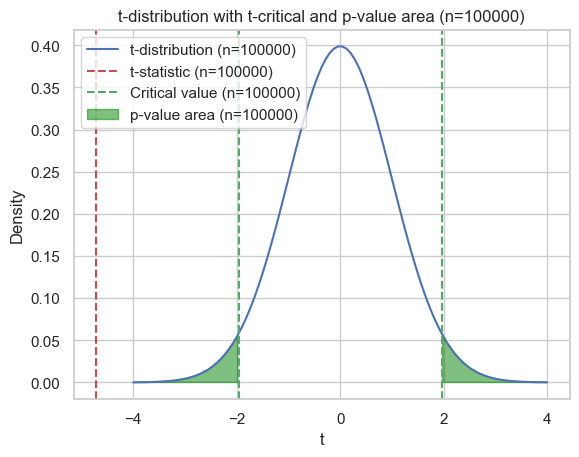

In [12]:
# Bigger sample size : 100000 out of 1M

sample_100000 = retail.sample(100000, random_state=42)
mean_100000 = sample_100000['TotalPrice'].mean()
std_100000 = sample_100000['TotalPrice'].std(ddof=1)
std_100000 = sample_100000['TotalPrice'].std(ddof=0)
# sample size
n_100000 = len(sample_100000)
# population mean
mu = 20
# t-test
t_100000 = (mean_100000 - mu) / (std_100000 / np.sqrt(n_100000))
# t-distribution
df_100000 = n_100000 - 1
# critical value
alpha = 0.05
t_critical_100000 = stats.t.ppf(1 - alpha / 2, df_100000)
# p-value
p_value_100000 = 2 * (1 - stats.t.cdf(abs(t_100000), df_100000))
# confidence interval
ci_100000 = (mean_100000 - t_critical_100000 * (std_100000 / np.sqrt(n_100000)), mean_100000 + t_critical_100000 * (std_100000 / np.sqrt(n_100000)))
# print results
print(f"Sample size: {n_100000}, Mean TotalPrice: {mean_100000:.2f}, t-statistic: {t_100000:.2f}, p-value: {p_value_100000:.2f}, Confidence interval: {ci_100000[0]:.2f} to {ci_100000[1]:.2f}")
# Conclusion
if abs(t_100000) > t_critical_100000 or p_value_100000 < alpha:
    print("Sample size 100000: Reject H0: The mean TotalPrice is not 20")
else:
    print("Sample size 100000: Fail to reject H0: The mean TotalPrice is 20")

r_total_mean = retail['TotalPrice'].mean()
print(f" Exact Mean is {r_total_mean:.2f}")

# draw t-distribution in blue
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# t-distribution
x = np.linspace(-4, 4, 100)
y = stats.t.pdf(x, df_100000)          
plt.plot(x, y, 'b-', label='t-distribution (n=100000)')
# draw t-statistic in red line
plt.axvline(t_100000, color='r', linestyle='--', label='t-statistic (n=100000)')
# draw critical value in dotted green line
plt.axvline(t_critical_100000, color='g', linestyle='--', label='Critical value (n=100000)')
plt.axvline(-t_critical_100000, color='g', linestyle='--')
#plt.axvline(r_total_mean, color='b', linestyle='--')

# draw p-value area in green
plt.fill_between(x, y, where=(x <= -abs(t_critical_100000)) | (x >= abs(t_critical_100000)), color='green', alpha=0.5, label='p-value area (n=100000)')
plt.title('t-distribution with t-critical and p-value area (n=100000)')
plt.xlabel('t')
plt.ylabel('Density')
plt.legend()
plt.show()





### 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

In [13]:
import scipy.stats as stats

# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

uk_data = retail[retail['Country'] == 'United Kingdom']['TotalPrice']
# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = uk_data.sample(size, random_state=42)
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")

# using stats.t.interval function from stats package
means = []
lower_bounds = []
upper_bounds = []
for size in sample_sizes:
    sample = uk_data.sample(size, random_state=42)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    ci = stats.t.interval(0.95, df=size-1, loc=sample_mean, scale=sample_std/np.sqrt(size))
    means.append(sample_mean)
    lower_bounds.append(ci[0])
    upper_bounds.append(ci[1])
    print(f"Sample size: {size}, Mean: {sample_mean:.2f}, 95% CI: {ci[0]:.2f} to {ci[1]:.2f}")

 

Sample size: 30, Mean: 11.88, 95% CI: (np.float64(6.37841466090658), np.float64(17.38425200576009))
Sample size: 100, Mean: 16.09, 95% CI: (np.float64(11.142955150004974), np.float64(21.02784484999502))
Sample size: 300, Mean: 13.34, 95% CI: (np.float64(11.264027626023802), np.float64(15.424439040642865))
Sample size: 30, Mean: 11.88, 95% CI: 6.38 to 17.38
Sample size: 100, Mean: 16.09, 95% CI: 11.14 to 21.03
Sample size: 300, Mean: 13.34, 95% CI: 11.26 to 15.42


### 문제 8 가설검정 t-test
영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
영국과 독일의 분포는 등분산성은 따른다고 가정
#### 가설 검정 결과 해석
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

In [14]:

# test if the mean of two groups are different
# H0 : mu_uk = mu_germany
# H1 : mu_uk != mu_germany
# alpha = 0.05
# t-test
# t = (xbar_uk - xbar_germany) / sqrt((s_uk^2 / n_uk) + (s_germany^2 / n_germany))
# xbar_uk = mean of uk_data
# xbar_germany = mean of germany_data
# s_uk = std of uk_data
# s_germany = std of germany_data
# n_uk = sample size of uk_data
# n_germany = sample size of germany_data
import numpy as np
from scipy import stats
uk_data = retail[retail['Country'] == 'United Kingdom']['TotalPrice']
germany_data = retail[retail['Country'] == 'Germany']['TotalPrice']
# sample mean
xbar_uk = np.mean(uk_data)
xbar_germany = np.mean(germany_data)
# sample std
s_uk = np.std(uk_data, ddof=1)
s_germany = np.std(germany_data, ddof=1)
# sample size
n_uk = len(uk_data)
n_germany = len(germany_data)
# population mean
mu = 20
# t-test
t = (xbar_uk - xbar_germany) / np.sqrt((s_uk**2 / n_uk) + (s_germany**2 / n_germany))
# t-distribution
df = n_uk + n_germany - 2
# critical value
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df)
# p-value
p_value = 2 * (1 - stats.t.cdf(abs(t), df))
# confidence interval
ci = (xbar_uk - xbar_germany - t_critical * np.sqrt((s_uk**2 / n_uk) + (s_germany**2 / n_germany)), 
       xbar_uk - xbar_germany + t_critical * np.sqrt((s_uk**2 / n_uk) + (s_germany**2 / n_germany)))
# print results
print(f"Sample mean of UK: {xbar_uk:.2f}")
print(f"Sample mean of Germany: {xbar_germany:.2f}")
print(f"Sample std of UK: {s_uk:.2f}")
print(f"Sample std of Germany: {s_germany:.2f}")
print(f"Sample size of UK: {n_uk}")
print(f"Sample size of Germany: {n_germany}")
print(f"t-statistic: {t:.2f}")
print(f"Critical value: {t_critical:.2f}")
print(f"p-value: {p_value:.2f}")
print(f"Confidence interval: {ci[0]:.2f} to {ci[1]:.2f}")
print(f"Reject H0: {abs(t) > t_critical} or p-value < alpha: {p_value < alpha}")
# Conclusion        
if p_value < alpha:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

Sample mean of UK: 16.69
Sample mean of Germany: 23.72
Sample std of UK: 303.03
Sample std of Germany: 36.72
Sample size of UK: 981330
Sample size of Germany: 17624
t-statistic: -17.03
Critical value: 1.96
p-value: 0.00
Confidence interval: -7.83 to -6.21
Reject H0: True or p-value < alpha: True
영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


## 2. A/B 테스트

### 문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.
	
          노출 수     구매 수     
페이지 A    1000        80
페이지 B    200         22

### **문제9)**

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요

In [15]:
# To perform A/B test on web page A and B for promote new trip package release. 
# A/B test with 
# H0 : mu_A = mu_B
# H1 : mu_A != mu_B
# alpha = 0.05
# t-test
# t = (xbar_A - xbar_B) / sqrt((s_A^2 / n_A) + (s_B^2 / n_B))
# xbar_A = mean of page A
# xbar_B = mean of page B
# s_A = std of page A
# s_B = std of page B
# n_A = sample size of page A
# n_B = sample size of page B

import numpy as np
from scipy import stats
# sample data
page_A = [1000,80] # clicks, conversion rate
page_B = [200,22]  # clicks, conversion rate

# sample mean
xbar_A = np.mean(page_A)
xbar_A = np.mean(page_A)
xbar_B = np.mean(page_B)
# sample std
s_A = np.std(page_A, ddof=1)
s_B = np.std(page_B, ddof=1)
# sample size
n_A = len(page_A)
n_B = len(page_B)
# population mean
mu = 20
# t-test
t = (xbar_A - xbar_B) / np.sqrt((s_A**2 / n_A) + (s_B**2 / n_B))
# t-distribution
df = n_A + n_B - 2
# critical value
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df)
# p-value
p_value = 2 * (1 - stats.t.cdf(abs(t), df))
# confidence interval
ci = (xbar_A - xbar_B - t_critical * np.sqrt((s_A**2 / n_A) + (s_B**2 / n_B)), 
       xbar_A - xbar_B + t_critical * np.sqrt((s_A**2 / n_A) + (s_B**2 / n_B)))
# print results
print(f"Sample mean of page A: {xbar_A:.2f}")
print(f"Sample mean of page B: {xbar_B:.2f}")
print(f"Sample std of page A: {s_A:.2f}")
print(f"Sample std of page B: {s_B:.2f}")
print(f"Sample size of page A: {n_A}")
print(f"Sample size of page B: {n_B}")
print(f"t-statistic: {t:.2f}")
print(f"Critical value: {t_critical:.2f}")
print(f"p-value: {p_value:.2f}")
print(f"Confidence interval: {ci[0]:.2f} to {ci[1]:.2f}")
print(f"Reject H0: {abs(t) > t_critical} or p-value < alpha: {p_value < alpha}")
# Conclusion    
if p_value < alpha:
    print("웹 페이지 A와 B의 평균 클릭 수에 유의한 차이가 있습니다.")
else:
    print("웹 페이지 A와 B의 평균 클릭 수에 유의한 차이가 없습니다.")


Sample mean of page A: 540.00
Sample mean of page B: 111.00
Sample std of page A: 650.54
Sample std of page B: 125.87
Sample size of page A: 2
Sample size of page B: 2
t-statistic: 0.92
Critical value: 4.30
p-value: 0.46
Confidence interval: -1586.92 to 2444.92
Reject H0: False or p-value < alpha: False
웹 페이지 A와 B의 평균 클릭 수에 유의한 차이가 없습니다.


### **문제 10)**

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요(추천 문헌 [요즘IT](https://yozm.wishket.com/))

### 답변
 
#### A/B 테스트 결과 해석시 통계적 유의성 대비 효과를 확인하는 것이 중요합니다.

1) 핵심 의사결정 원칙
통계적 유의성만으로 판단하지 않기: p-값이 유의하더라도 실질적 효과 없다면 의미 없다.

2) 비용-효익 분석 중심
구현 비용이 낮고 효과가 작다면 → 적용 가능
구현 비용이 높고 효과가 작다면 → 재고려 필요

3) 비즈니스 맥락에서 평가
실질적 의미 평가
기회비용과 우선순위 검토
장기적 누적 효과 고려

실무 적용 사례
저비용 변경(버튼 색상): 구현 쉽고 부작용 없다면 작은 개선도 적용
고비용 변경(온보딩 프로세스): 효과가 작다면 더 큰 개선 기회에 리소스 투입
무비용 변경(뉴스레터 제목): 즉시 적용하되 지속적 모니터링 병행

### 작은 차이라도 비즈니스에 미치는 실질적 영향, 구현 비용, 기회비용을 종합적으로 고려하여 의사결정하는 것이 핵심입니다.